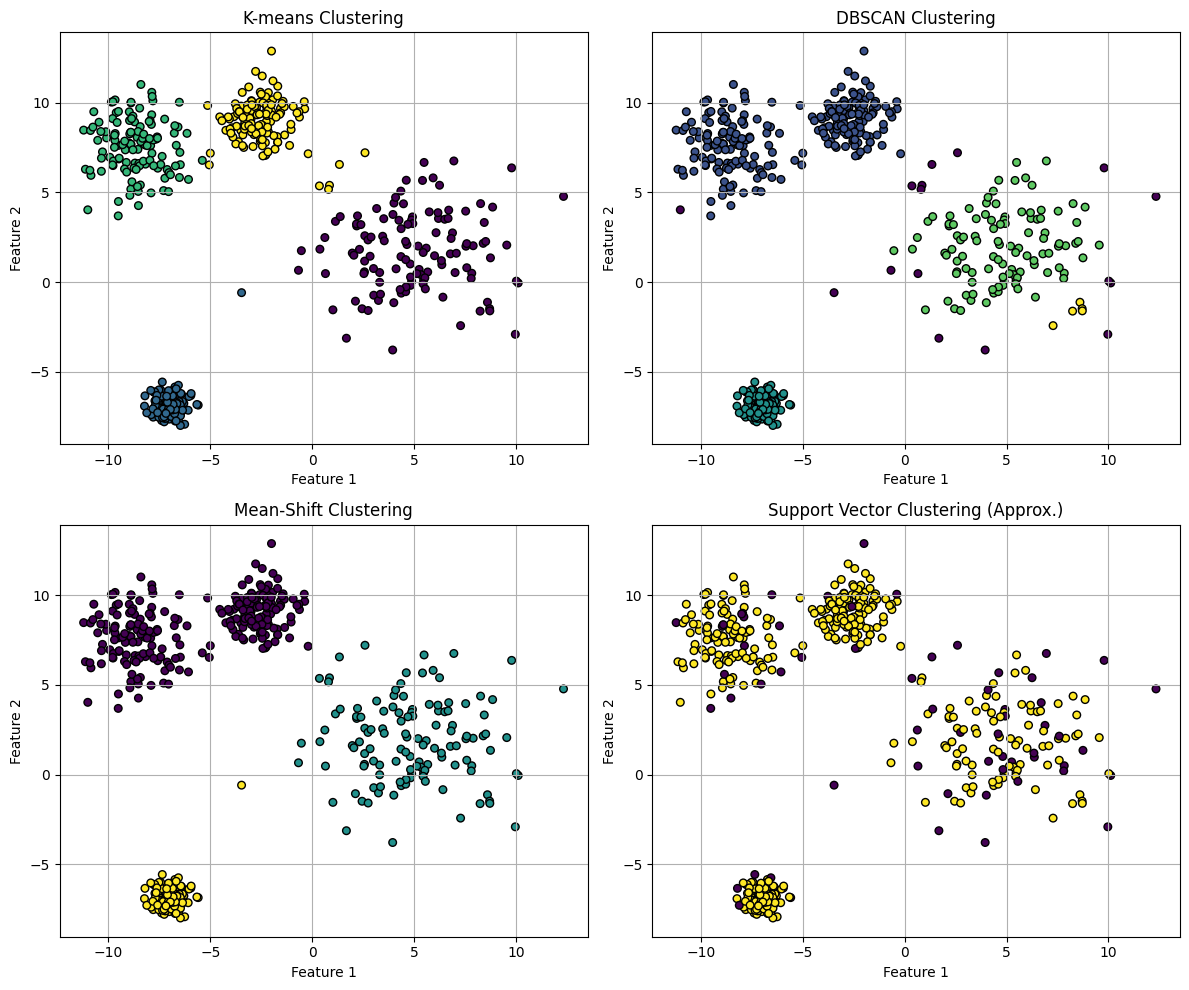

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.svm import OneClassSVM

# Support Vector Clustering 근사 구현 (OneClassSVM 활용)
def support_vector_clustering(X, gamma=1.0):
    svm = OneClassSVM(kernel='rbf', gamma=gamma, nu=0.1)
    svm.fit(X)
    labels = svm.predict(X)
    labels = np.where(labels == 1, 0, -1)  # 1은 클러스터, -1은 노이즈
    return labels

# 데이터 생성: 4개의 클러스터, 다양한 밀도와 분포
X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=[1.0, 2.5, 0.5, 1.5], random_state=42)

# K-means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Mean-shift
meanshift = MeanShift()
meanshift_labels = meanshift.fit_predict(X)

# Support Vector Clustering
svc_labels = support_vector_clustering(X, gamma=0.5)

# 시각화
plt.figure(figsize=(12, 10))
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=30, edgecolor='k')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)

plt.subplot(222)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', s=30, edgecolor='k')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)

plt.subplot(223)
plt.scatter(X[:, 0], X[:, 1], c=meanshift_labels, cmap='viridis', s=30, edgecolor='k')
plt.title('Mean-Shift Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)

plt.subplot(224)
plt.scatter(X[:, 0], X[:, 1], c=svc_labels, cmap='viridis', s=30, edgecolor='k')
plt.title('Support Vector Clustering (Approx.)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)

plt.tight_layout()
plt.show()
